**ESCUELA DE INGENIERÍA MECATRÓNICA**

## `PROCESAMIENTO DIGITAL DE SEÑALES E IMÁGENES`

### `Docente: Ms. Ing. Emerson Maximo Asto Rodriguez`

```
Práctica 7A: Filtrado en el espacio
```

INTEGRANTES
1. Calderón Alvarado, Jeremy Lorenzo
2. Carrillo Guevara, Abigail Bibiana
3. Condor Flores, César Emilio

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### 1. Implemente un algoritmo que permita realizar la correlacion 2D de una imagen de MxN con una mascara de mxn
* El algoritmo debe retornar una imagen de las mismas dimensiones que la imagen de entrada, recuerde que el "padding" usualmente se hace con ceros, no obstante se puede duplicar filas o columnas del borde, o hacerlo mediante un espejo sobre el borde.*

* El algoritmo tambien puede obtener la solución sin necesidad del "padding", agregando varias condicionales que permitan solo ponderar con los datos coincidentes.*

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
def filtro_espacial(imagen, filtro):
    M, N = imagen.shape #Obteniendo las dimensiones de la imagen
    m, n = filtro.shape #Obteniendo las dimensiones del filtro

    filas_add = np.int8((m - 1) / 2)
    columnas_add = np.int8((n - 1) / 2)

    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * filtro
            resultado[i-filas_add, j-columnas_add] = np.sum(multiplicacion)

    return resultado

1. ¿Por qué es importante el uso de técnicas de padding en la aplicación de filtros espaciales?
* Porque con la utilización de estas técnicas se conserva el tamaño de la imagen original tras la aplicación del filtro. Así, a través de la añadidura de píxles adicionales alrededor de la imagen original, se logra mantener el tamaño y permite que las redes neuronales alcancen mayor profundidad.

2. Explica qué es un kernel (o máscara) en un filtro espacial y cómo influye su tamaño en el procesamiento de imágenes.
* Un kernel, o máscara, es una pequeña matriz utilizada para procesar píxeles en un área específica de la imagen mediante operaciones de convolución. La matriz contiene valores que definen la influencia de los píxeles vecinos en el resultado de la operación. El tamaño del kernel afecta la intensidad de la operación: por ejemplo, un kernel más grande en un filtro de suavizado tenderá a producir un mayor efecto borroso, mientras que en un filtro de nitidez intensificará los bordes más pronunciados.

In [ ]:
img = np.arange(100).reshape(10,10)
filtro = np.ones((5,7))

print(img)
print(filtro)

img_filtrada = filtro_espacial(img, filtro)

[[ 0  1  2  3  4  5  6  7  8  9]
 [10 11 12 13 14 15 16 17 18 19]
 [20 21 22 23 24 25 26 27 28 29]
 [30 31 32 33 34 35 36 37 38 39]
 [40 41 42 43 44 45 46 47 48 49]
 [50 51 52 53 54 55 56 57 58 59]
 [60 61 62 63 64 65 66 67 68 69]
 [70 71 72 73 74 75 76 77 78 79]
 [80 81 82 83 84 85 86 87 88 89]
 [90 91 92 93 94 95 96 97 98 99]]
[[1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1. 1. 1.]]


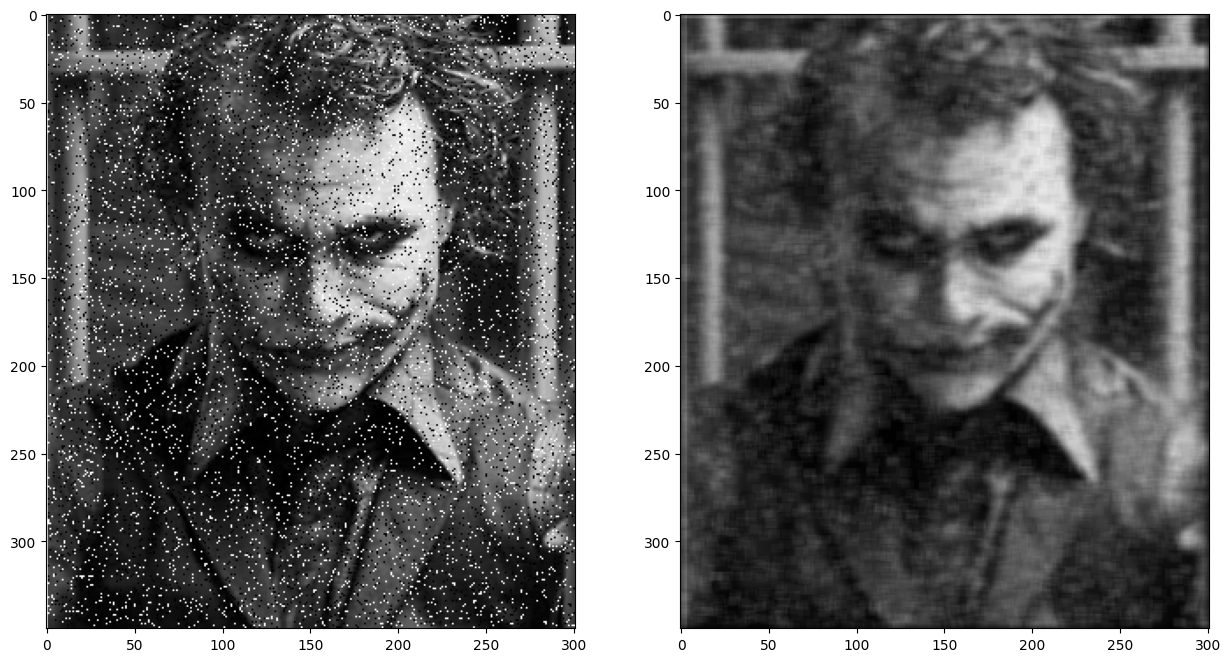

In [ ]:
img_ruido = cv2.imread('/content/drive/MyDrive/Imagenes/ruido.png', 0)/255

filtro = np.ones((5,7))
filtro = filtro/np.sum(filtro)

img_ruido_filtrada = filtro_espacial(img_ruido, filtro)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_ruido, cmap='gray')
plt.subplot(122)
plt.imshow(img_ruido_filtrada, cmap='gray', vmin=0, vmax=1)
plt.show()

### 2.- Implemente un algoritmo que permita mejorar solo los pixeles oscuros y de bajo contraste
*Puede modificar levemente el algoritmo realizado en el enunciado **1** para lograr el objetivo*

In [ ]:
def filtro_espacial_estadistico(imagen, selem = np.ones((3,3))):
    media_global = np.mean(imagen)
    desv_global = np.std(imagen)

    M, N = imagen.shape
    m, n = selem.shape

    filas_add = np.int8((m - 1) / 2)
    columnas_add = np.int8((n - 1) / 2)

    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            media_loc = np.mean(multiplicacion)
            desv_loc = np.std(multiplicacion)

            if (media_loc<media_global) and (desv_loc<0.8*desv_global) and (desv_loc>0.2*desv_global):
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]*1.5
            else:
                resultado[i-filas_add, j-columnas_add] = img_pad[i,j]

    return resultado

1. ¿Cuál es el objetivo de este algoritmo y qué tipo de imágenes se benefician más de su aplicación?
* Su objetivo es mejorar los píxeles oscuros y de bajo contraste. Este filtro beneficia a imágenes que tienen bajo contraste y poca iluminación.

2. Vecindad y Kernel: ¿Cómo se define la vecindad de un píxel en este código y cuál es la importancia de la variable selem en este contexto?
* La vecindad de un píxel se define en la línea 18. Para un filtro con el tamaño 3x3 (por defecto), considera que el pixel analizado está en el centro y selecciona su vecindad desde los píxeles en la columna y fila anteriores a la actual hasta la columna y fila inmediatamente posteriores a la ubicación del píxel. El resultado es que la vecindad viene a ser un cuadrado de 3x3 píxeles con el píxel analizado en el centro. La variable selem viene a ser el tamaño del filtro (en este caso de 3x3) por lo que afectará el resultado final, al ser este parámetro importante en el funcionamiento del filtro.

3. ¿Qué efecto tiene el factor de escala de 1.5 en los píxeles mejorados y cómo podría ajustarse para obtener diferentes resultados?
* El factor de escala 1.5 amplifica la intensidad de los píxeles, haciendo que los detalles mejorados se vean más prominentes. Para obtener un efecto más pronunciado, se necesita aumentar el factor de escala, mientras que el factor debe disminuir para tener un efecto más sutil. Si este factor llega a ser menor a 1, tendrá el efecto contrario de hacer la imagen más oscura y borrosa.


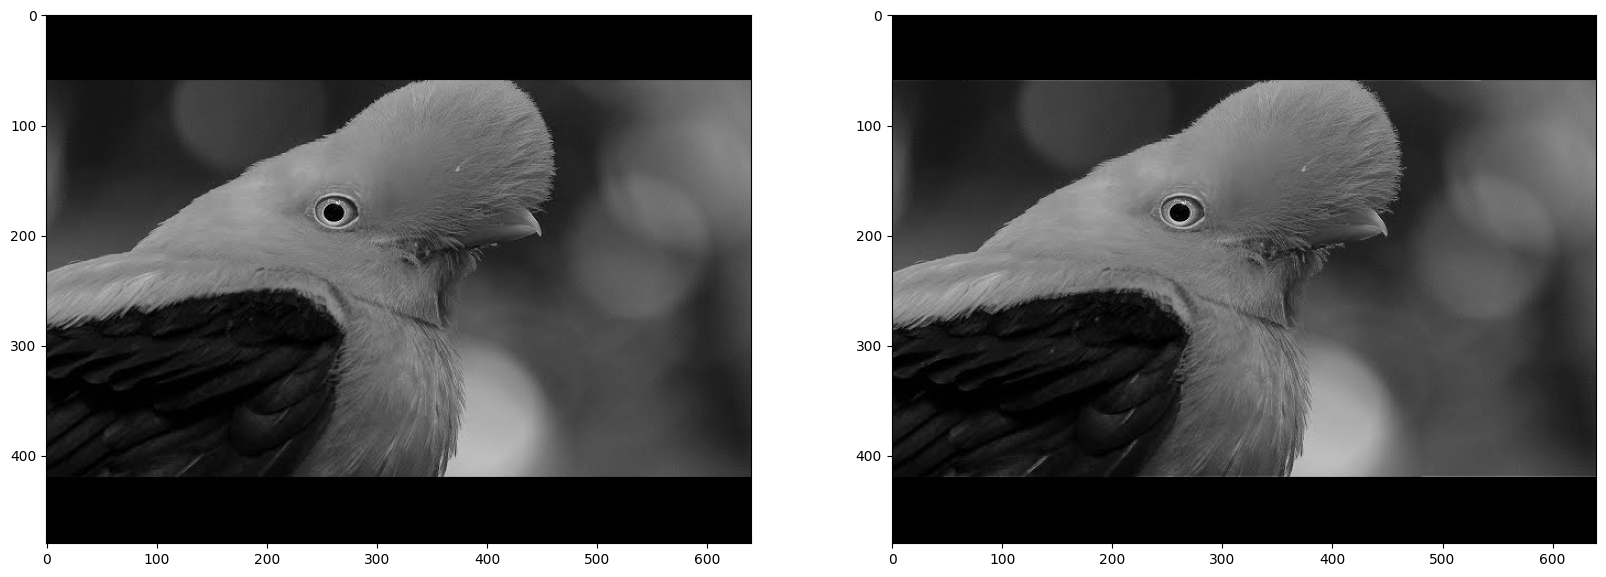

In [ ]:
img_delfin = np.uint16(cv2.imread('/content/template.jpg', 0))
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin)
plt.subplots(1,2, figsize=(20,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

### 3.- Implemente los filtros estadisticos min, max, moda y mediana


In [ ]:
from scipy.stats import mode

def filtro_espacial_estadistico(imagen, selem = np.ones((3,3)), filter_type='median'):
    M, N = imagen.shape
    m, n = selem.shape

    filas_add = np.int8((m - 1) / 2)
    columnas_add = np.int8((n - 1) / 2)

#     img_pad = np.zeros((M+ filas_adicionales*2, N + columnas_adicionales*2))
    img_pad = np.zeros((M + m - 1, N + n - 1))
    img_pad[filas_add: filas_add + M, columnas_add: columnas_add+ N ] = imagen

    resultado = np.zeros_like(imagen)

    for i in np.arange(filas_add, filas_add + M):
        for j in np.arange(columnas_add, columnas_add + N):
            vecindad = img_pad[i-filas_add: i+filas_add+1, j-columnas_add: j+columnas_add+1]

            multiplicacion = vecindad * selem

            if filter_type =='min':
                resultado[i-filas_add, j-columnas_add] = np.min(multiplicacion)
            elif filter_type == 'max':
                resultado[i-filas_add, j-columnas_add] = np.max(multiplicacion)
            elif filter_type == 'median':
                resultado[i-filas_add, j-columnas_add] = np.median(multiplicacion)
            elif filter_type == 'mode':
                resultado[i-filas_add, j-columnas_add] = mode(multiplicacion, axis=None)[0]

    return resultado

1. ¿Qué es un filtro estadístico en el procesamiento de imágenes y cómo se aplica en el código mostrado?

Un filtro estadístico en procesamiento de imágenes es una técnica que utiliza estadísticas de los píxeles vecinos de una imagen para mejorarla.
En el código se aplica a través de un algoritmo que recorre cada píxel de la imagen y calcula el valor resultante utilizando una ventana de píxeles vecinos. Por ejemplos, en un filtro de media, el valor de cada píxel es reemplazado por el promedio de sus vecinos dentro de la ventana.

2. ¿Qué diferencias existen entre los filtros de tipo min, max, median y mode? Explica en qué situaciones sería adecuado usar cada tipo.

La diferencia se basa en con que valor reemplaza los pixeles.

*El filtro de Mínimo reemplaza cada píxel con el valor mínimo de una ventana de vecinos. Es útil para eliminar resaltos o ruidos brillantes en la imagen, ya que suprime los píxeles de alto valor. Se aplica en áreas donde se necesita suavizar zonas con ruido "sal y pimienta" oscuro.
*El filtro de Máximo reemplaza cada píxel con el valor máximo de una ventana de vecinos, destacando los píxeles más brillantes. Se utiliza para rellenar pequeños agujeros y resaltar características claras en imágenes oscuras, siendo útil en aplicaciones de procesamiento de imágenes médicas.
El filtro de Mediana sustituye el valor de cada píxel por la mediana de sus vecinos, lo cual ayuda a reducir el ruido de tipo sal y pimienta sin distorsionar los bordes de la imagen, es utilizado en análisis de imágenes biológicas.

Por último, El filtro de Moda asigna el valor que más se repite en la ventana de vecinos, su aplicación entra a tallar con imágenes con ruidos impulsivos o donde el patrón dominante es deseado.


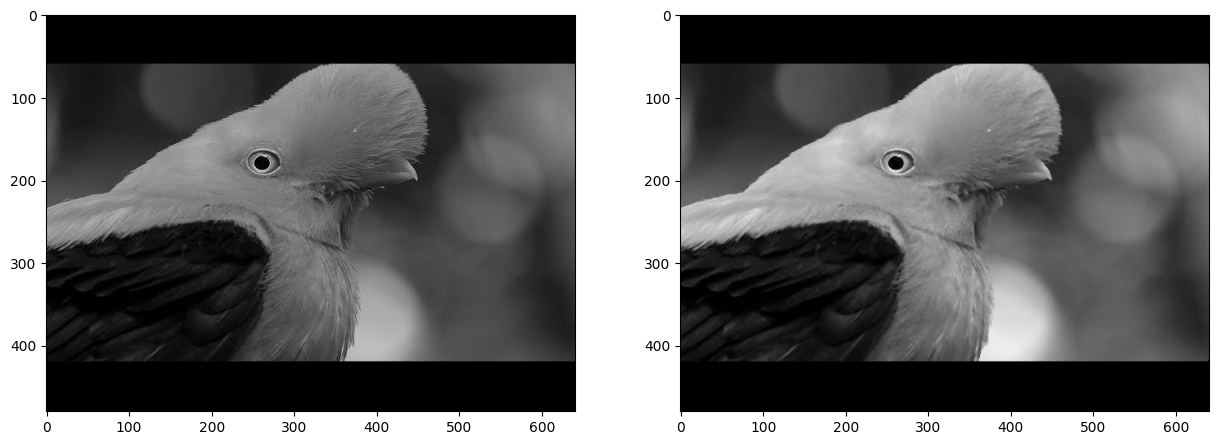

In [ ]:
#MINIMO
img_delfin = np.uint16(cv2.imread('/content/template.jpg', 0))
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

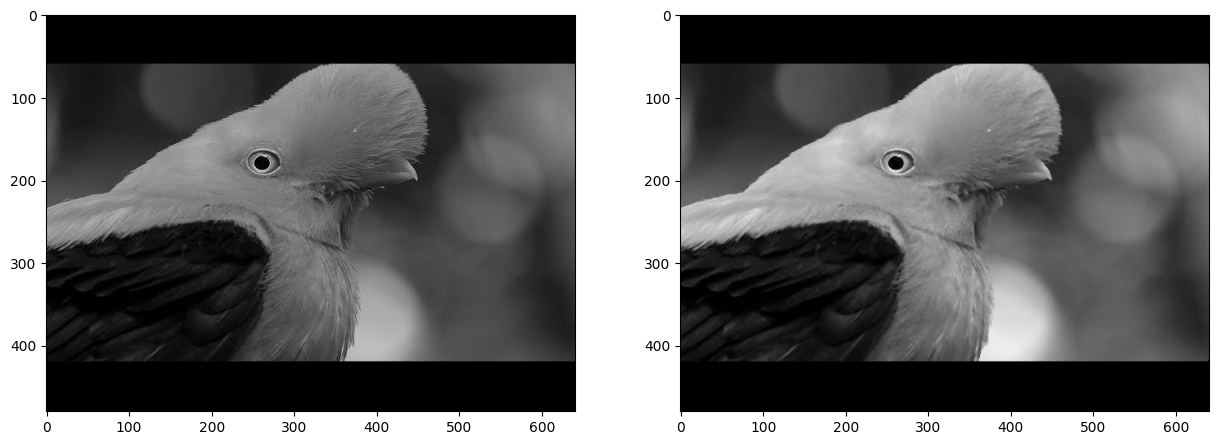

In [ ]:
#MAX
img_delfin = np.uint16(cv2.imread('/content/template.jpg', 0))
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

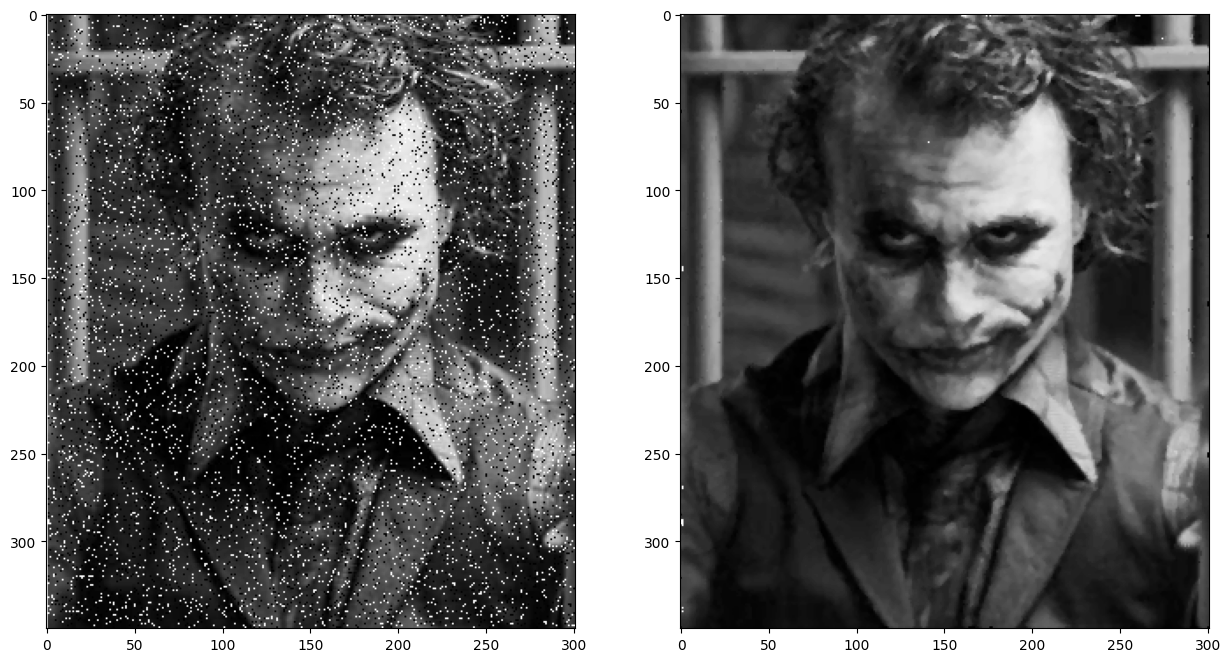

In [ ]:
#MEDIANA
img_delfin = np.uint16(cv2.imread('/content/drive/MyDrive/Imagenes/ruido.png', 0))
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

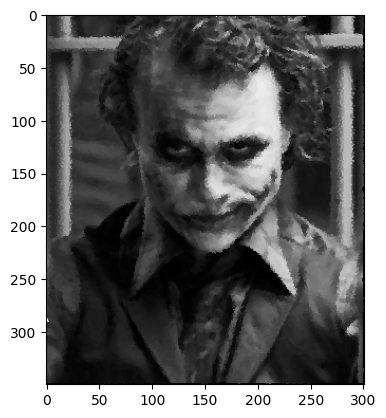

In [ ]:
img_median_mode = filtro_espacial_estadistico(img_delfin_filtrada, filter_type='mode')
plt.imshow(img_median_mode, cmap='gray')
plt.show()

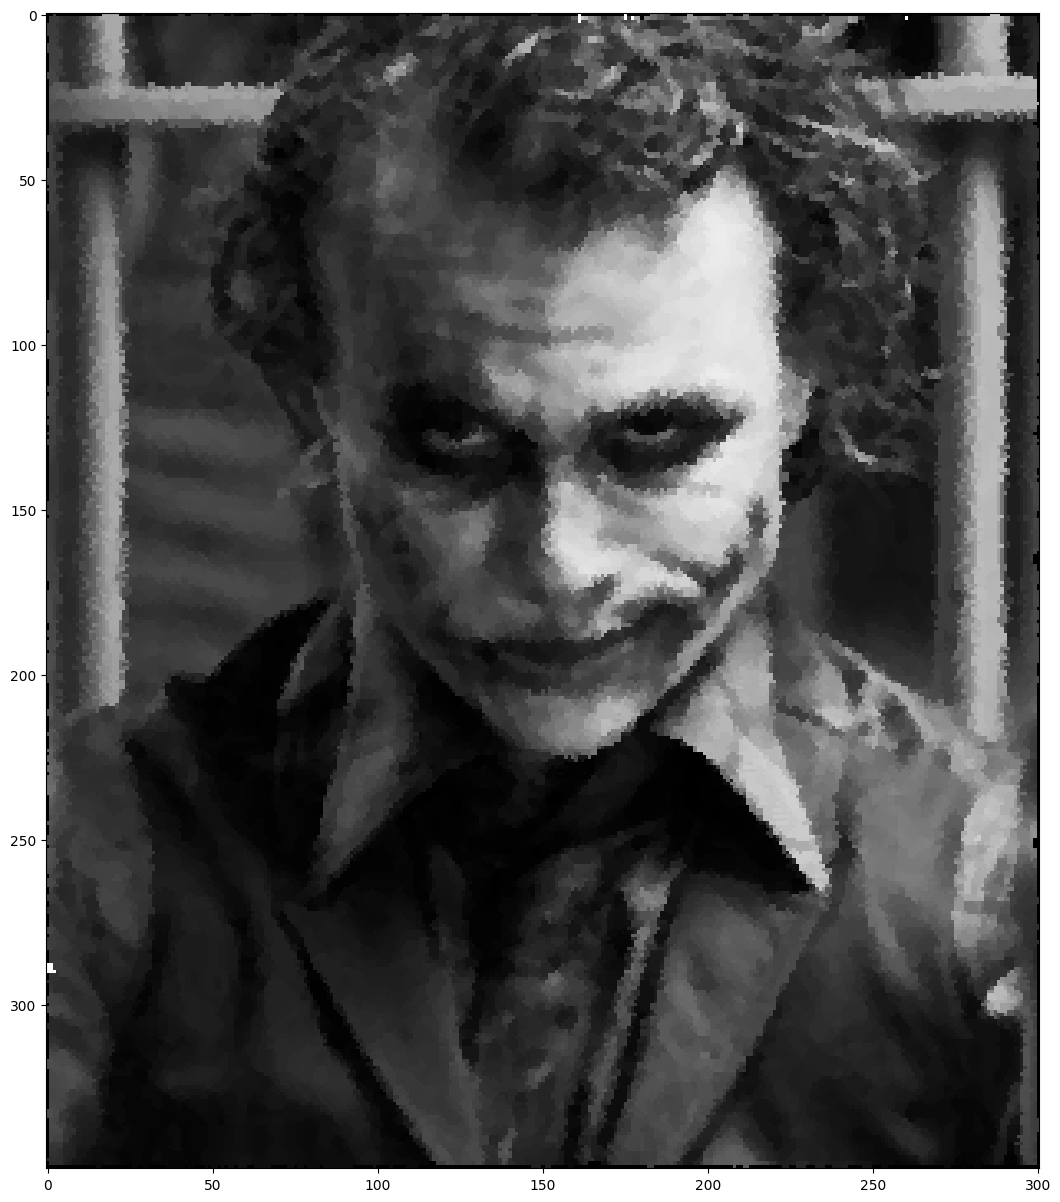

In [ ]:
plt.figure(figsize=(15,15))
plt.imshow(img_median_mode, cmap='gray')
plt.show()

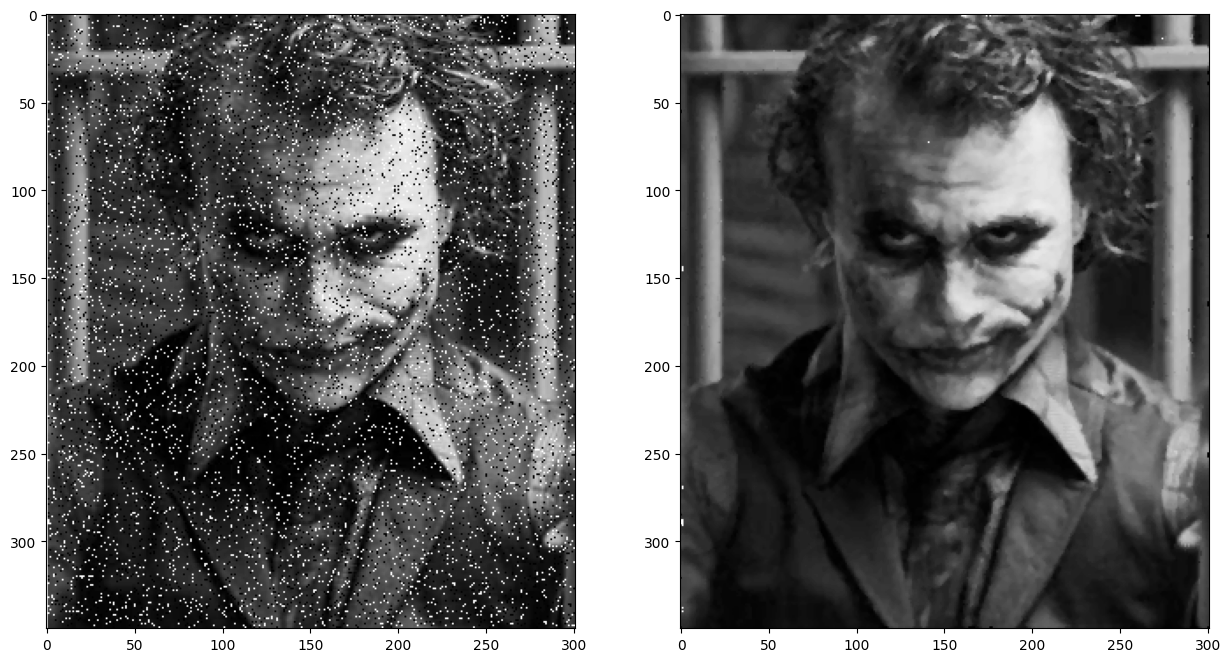

In [ ]:
#MODA
img_delfin = np.uint16(cv2.imread('/content/drive/MyDrive/Imagenes/ruido.png', 0))
img_delfin_filtrada = filtro_espacial_estadistico(img_delfin)
plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_delfin, cmap='gray')
plt.subplot(122)
plt.imshow(img_delfin_filtrada, cmap='gray')
plt.show()

### 4.- Implemente los filtros espaciales de suavizado y nitidez explicados en clase

Utilizando la funcion **convolve2d(img, kernel, mode= "same")** de **scipy.signal** y los kernels:
(tambien se puede usar **correlate2d**)
* Promedio
* Gaussiano
* Laplaciano


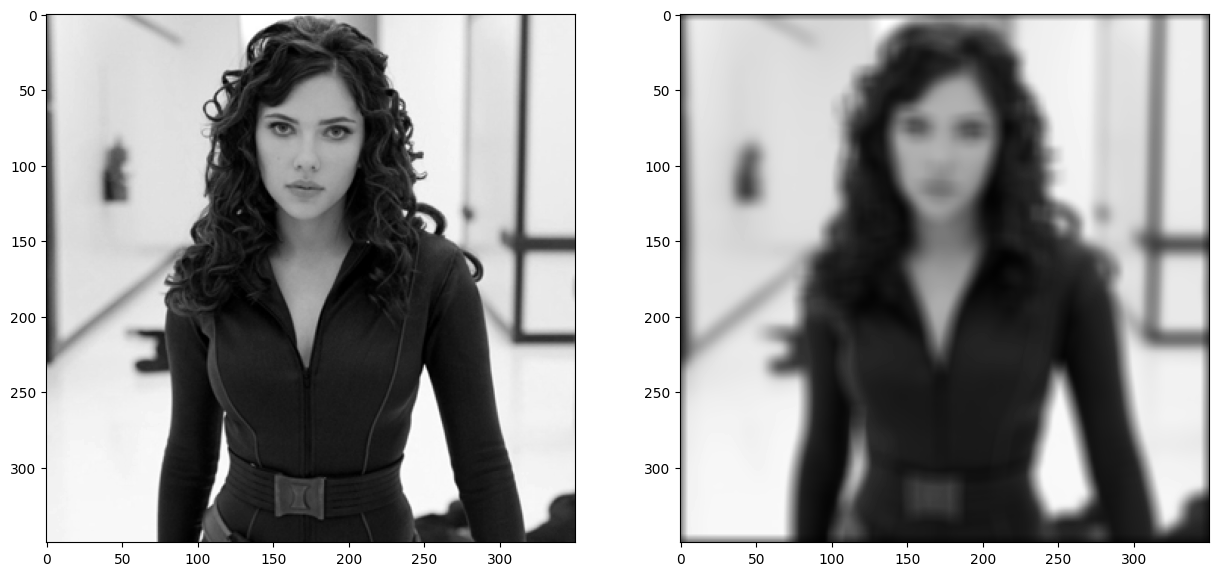

In [ ]:
#PROMEDIO
from scipy import signal

img = cv2.imread("/content/drive/MyDrive/Imagenes/scarlett_oc.png", 0)/255
kernel = np.ones((11,11))/121

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

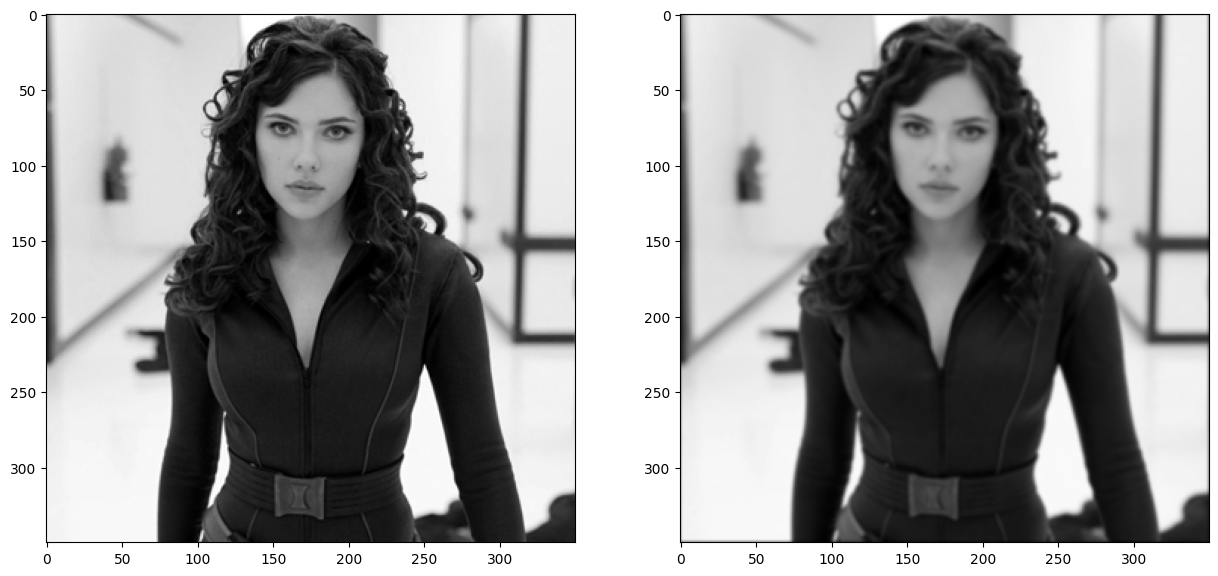

In [ ]:
#PROMEDIO
from scipy import signal

img = cv2.imread("/content/drive/MyDrive/Imagenes/scarlett_oc.png", 0)/255
# kernel = np.array([[1,2,1], [2,4,2], [1,2,1]])/16
kernel = np.array([1,4,7,4,1])*np.array([[1],[4],[7],[4],[1]])
kernel = kernel/np.sum(kernel)

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(np.abs(out), cmap="gray", vmin=0, vmax=1)
plt.show()

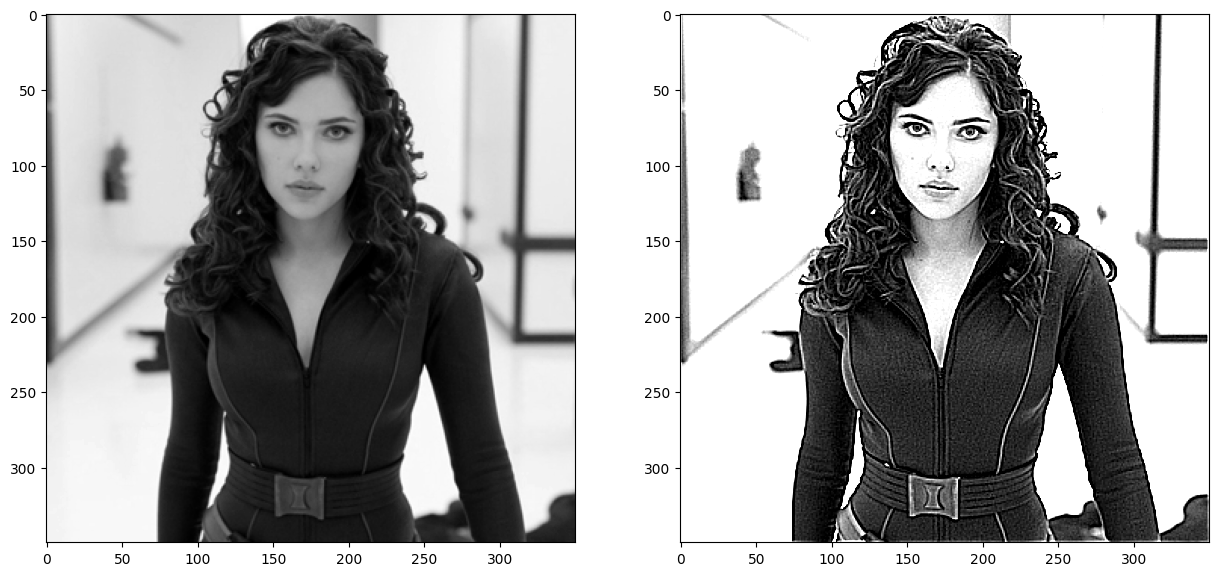

In [ ]:
#LAPLACIANO
from scipy import signal
A = 1.5
img = cv2.imread("/content/drive/MyDrive/Imagenes/scarlett_oc.png", 0)/255
kernel = np.array([[-1,-1,-1], [-1,A+8,-1], [-1,-1,-1]])

out = signal.convolve2d(img, kernel, mode= "same")

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

**Utilizando OpenCV:**
* cv2.blur(img, (Tamaño_kernel))
* cv2.GaussianBlur(img,(Tamaño_kernel),desviacion_estandar)
* cv2.medianBlur(img,Tamaño_kernel)
* cv2.bilateralFilter(img,tamaño_kernel,sigmacolor,sigmaspace)  [Mas info](https://homepages.inf.ed.ac.uk/rbf/CVonline/LOCAL_COPIES/MANDUCHI1/Bilateral_Filtering.html)

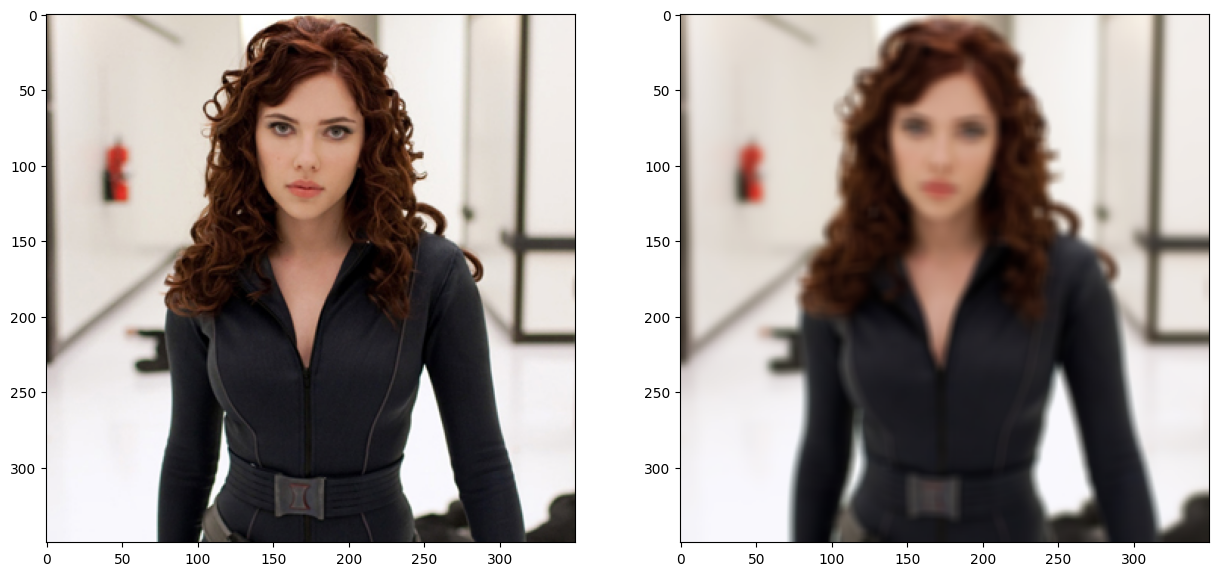

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Imagenes/scarlett_oc.png")[..., ::-1]

out = cv2.blur(img, (7,7))

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

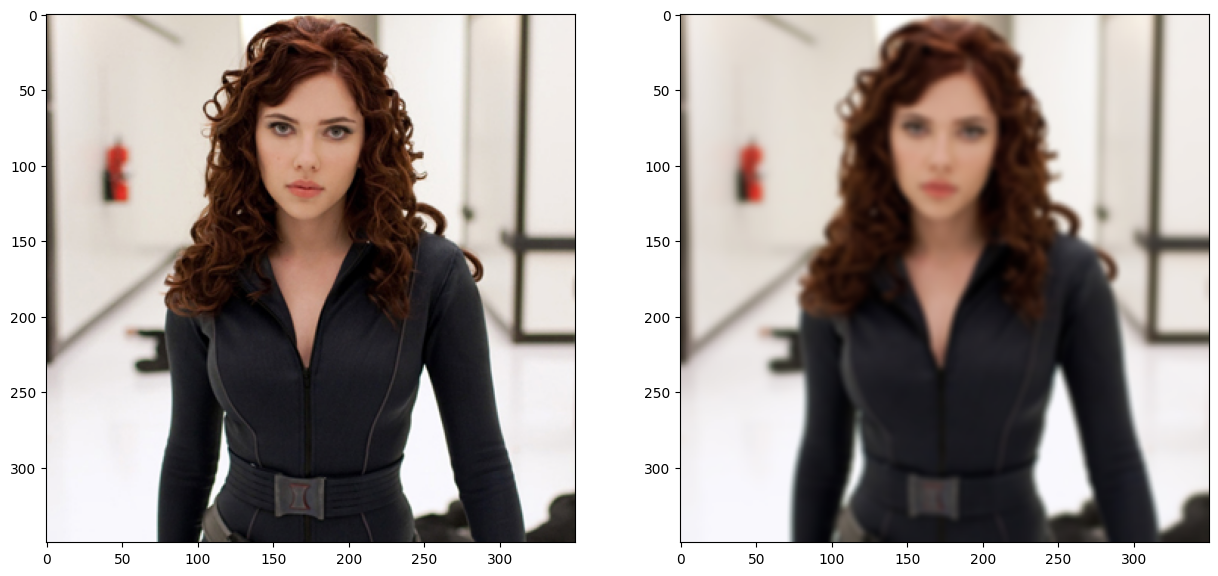

In [ ]:
out = cv2.GaussianBlur(img,(7,7), 2)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

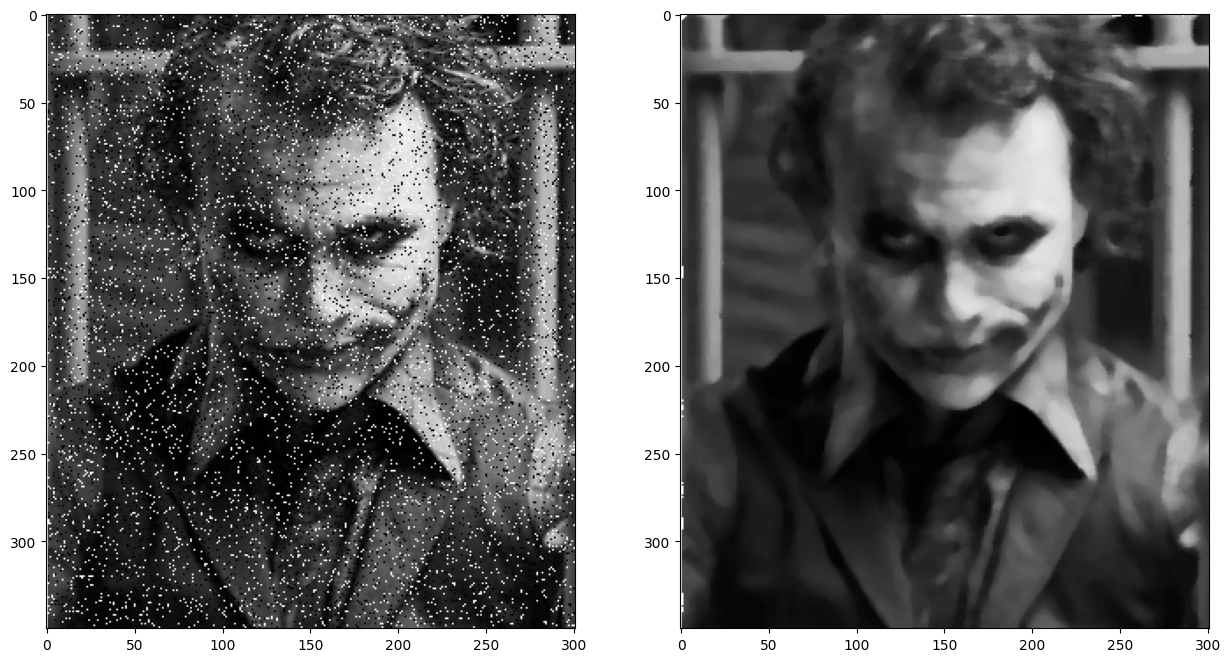

In [ ]:
img_joker = cv2.imread('/content/drive/MyDrive/Imagenes/ruido.png')[..., ::-1]

img_joker_filtrada = cv2.medianBlur(img_joker, 7)

plt.subplots(1,2, figsize=(15,20))
plt.subplot(121)
plt.imshow(img_joker, cmap='gray')
plt.subplot(122)
plt.imshow(img_joker_filtrada, cmap='gray')
plt.show()

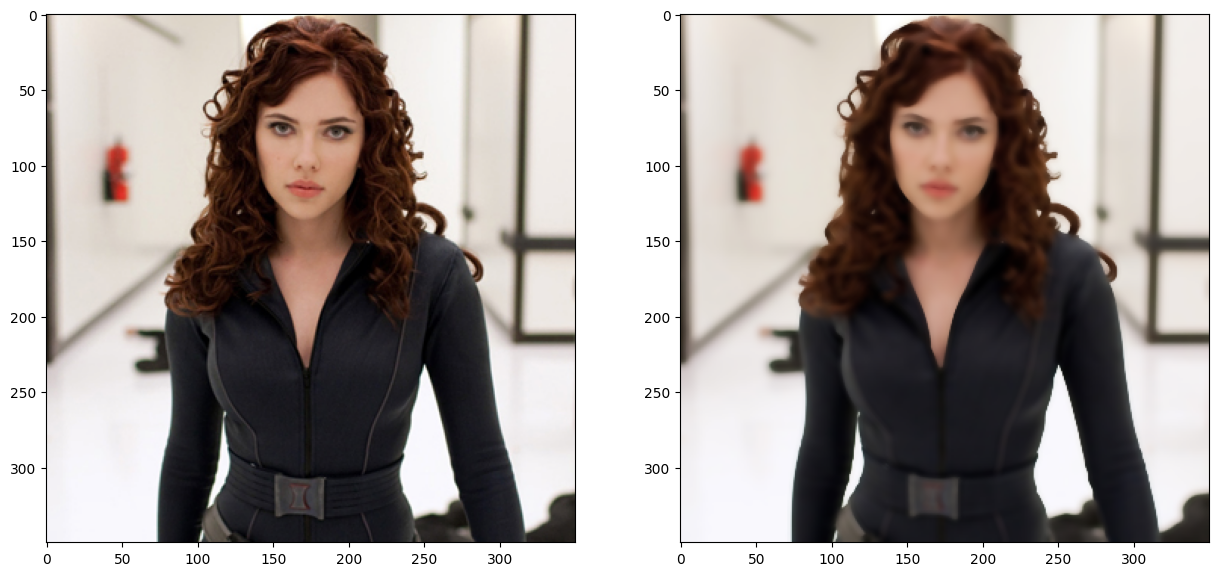

In [ ]:
out = cv2.bilateralFilter(img,7, 160, 160)

plt.figure(figsize=(15,15))
plt.subplot(121)
plt.imshow(img, cmap="gray")
plt.subplot(122)
plt.imshow(out, cmap="gray", vmin=0, vmax=1)
plt.show()

1. ¿Cuál es la diferencia fundamental entre los filtros de suavizado (como el de promedio y el Gaussiano) y los filtros de nitidez (como el Laplaciano)?

La diferencia clave entre los filtros de suavizado y los de nitidez radica en su propósito y en cómo procesan la imagen. Los primeros reducen el ruido y suavizan los detalles, lo cual puede hacer que la imagen pierda definición en los bordes. Y los segundos mejorar la nitidez de la imagen resaltando los bordes.

2. ¿Cuáles son las principales diferencias en los resultados obtenidos al aplicar un filtro de promedio versus un filtro Gaussiano?

El filtro de promedio reduce el ruido de alto nivel, pero tiende a perder detalles en los bordes, produciendo un desenfoque menos refinado. En cambio, el filtro gaussiano se enfoca más en los píxeles centrales, suavizando el ruido manteniendo los bordes con mayor claridad que el filtro de promedio.

3. ¿Qué propiedades tiene el kernel Laplaciano y cómo contribuye a la nitidez de la imagen? ¿Qué efectos visuales produce al aplicarse a una imagen?

El kernel Laplaciano tiene varias propiedades que lo hacen adecuado para realzar detalles y bordes en imágenes: Mide el segundo derivado en todas las direcciones, lo cual permite detectar cambios abruptos de intensidad, típicos en los bordes. Tambien, enfatiza las variaciones de alta frecuencia (detalles y bordes). Destaca los contornos de los objetos en la imagen, lo que genera un efecto de nitidez al resaltar las transiciones entre áreas de diferente intensidad. Además, resalta los cambios rápidos en la intensidad, es ampliamente usado para resaltar detalles finos y puede dejar la imagen con un aspecto más definido y claro.

4. ¿Qué significa el argumento mode="same" en la función convolve2d y cómo afecta el tamaño de la imagen resultante después de aplicar el filtro?

El argumento mode="same" permite que la imagen resultante tenga el mismo tamaño que la imagen original. Mediante métodos de pagging o rellenando con ceros, permite que un filtro alcance los bordes de la imagen sin reducir el tamaño de la salida.

### 5.- Implemente un algoritmo para muestre el uso de la mascara de desenfoque (unsharp mask) y el filtro de altoaumento (Highboost)

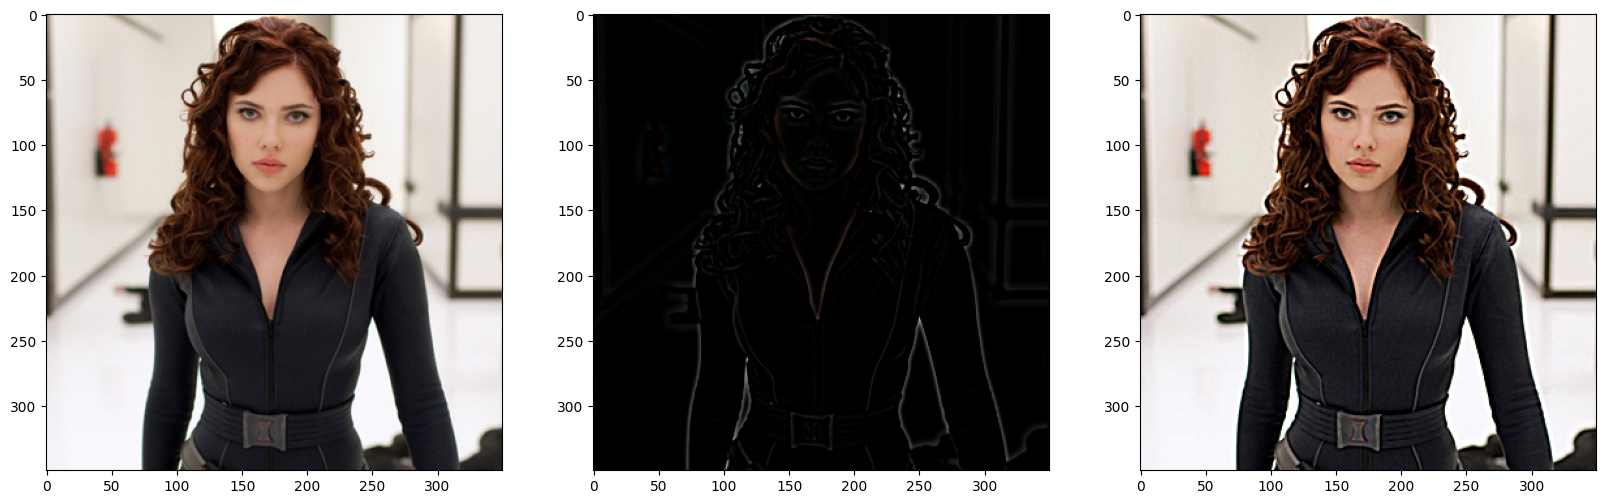

In [ ]:
img = cv2.imread("/content/drive/MyDrive/Imagenes/scarlett_oc.png")[..., ::-1]/255

blur = cv2.blur(img, (7,7))

mask = img - blur

unsharp_image = mask + img

plt.figure(figsize=(20,15))
plt.subplot(131)
plt.imshow(img, cmap="gray")
plt.subplot(132)
plt.imshow(mask, cmap="gray")
plt.subplot(133)
plt.imshow(unsharp_image, cmap='gray', vmin=0, vmax=1)
plt.show()

1. ¿Cómo funciona la máscara de desenfoque (unsharp mask) para realzar los detalles de una imagen, y cuál es el papel del filtro de suavizado en este proceso?

La máscara de desenfoque realza detalles al restar una versión suavizada de la imagen (creada con el filtro de suavizado) de la imagen original, lo cual aumenta el contraste en los bordes sin incrementar el ruido o las imperfecciones.

2.  ¿En qué se diferencia el filtro de alto aumento (Highboost) de la máscara de desenfoque estándar, y cómo se puede ajustar el factor de amplificación (boosting factor) para controlar el nivel de realce en la imagen?

El filtro de alto aumento es una versión amplificada de la máscara de desenfoque donde un factor de amplificación controla el nivel de realce o nitidez en la imagen. A menor factor, menor realce; y a mayor factor, mayor nitidez y contraste.

### 6.- Implemente un algoritmo para mostrar la gradiente de una imagen
**Use las mascaras:**
* Roberts
* Prewit
* Sobel
* Scharr

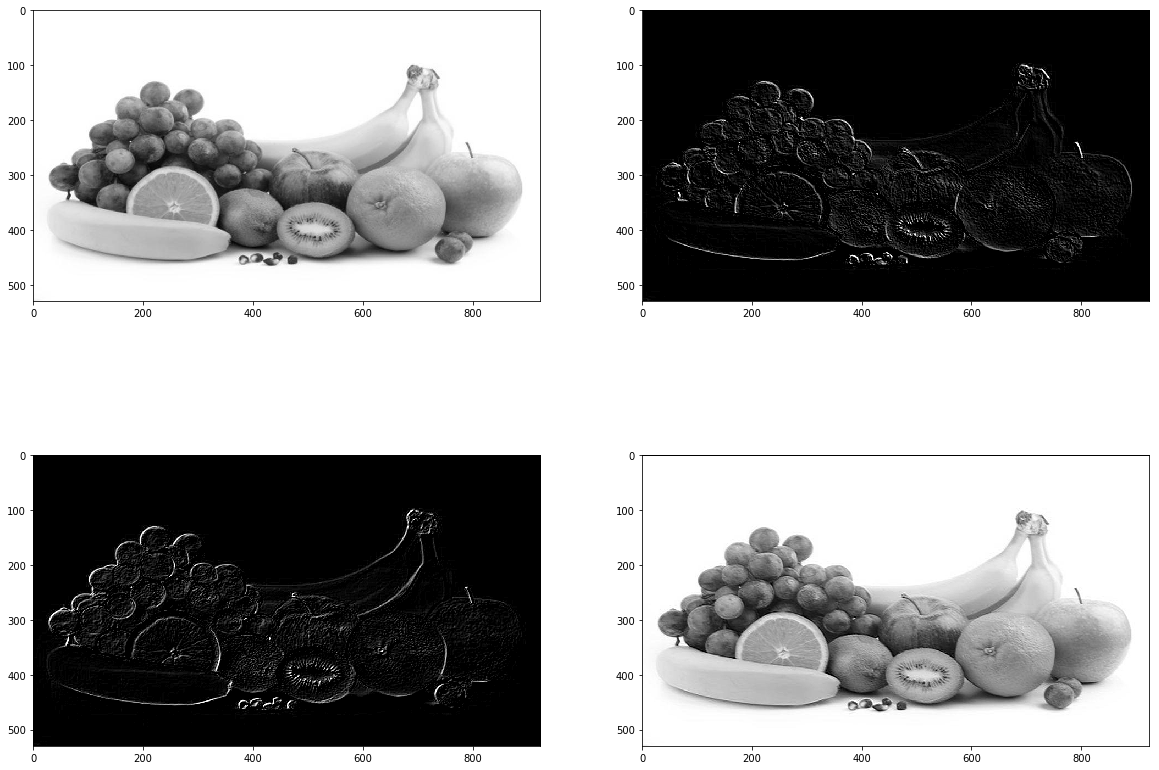

In [ ]:
#ROBERTS
img = cv2.imread("../Imagenes/frutas.jpg", 0)/255

kernelh = np.array([[0,-1],[1,0]])
kernelv = np.array([[-1,0],[0,1]])

outh = signal.convolve2d(img, kernelh, mode= "same")
outv = signal.convolve2d(img, kernelv, mode= "same")

outf = outh + outv

plt.figure(figsize=(20,15))
plt.subplot(221)
plt.imshow(img, cmap="gray")
plt.subplot(222)
plt.imshow(outh * 5, cmap="gray", vmin=0, vmax=1)
plt.subplot(223)
plt.imshow(outv * 5, cmap="gray", vmin=0, vmax=1)
plt.subplot(224)
plt.imshow(outf + img, cmap="gray", vmin=0, vmax=1)
plt.show()

1. ¿Cuál es la característica distintiva de la máscara de Roberts al calcular el gradiente de una imagen, y por qué podría ser menos precisa que otras máscaras?

La máscara de Roberts utiliza una pequeña matriz (2x2) para calcular cambios de intensidad, detectando bordes en ángulos específicos. Puede ser menos precisa que otras máscaras porque calcula gradientes en una región pequeña y es extremadamente sensible al ruido, suele utilizarse en imágenes binarias.

2. ¿Cómo afectan las máscaras de Sobel y Scharr a la precisión y sensibilidad en la detección de bordes en una imagen? ¿En qué casos se prefiere una sobre la otra?

La máscara de Sobel es más común en la detección de bordes, pero la máscara de Scharr es más precisa y robusta para gradientes fuertes y bordes más definidos.
Sobel se usa para detección general, mientras Scharr es preferible para bordes con transiciones de intensidad intensas o cuando se requiere una alta precisión.